In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
#reading the iris flower dataset.
first_dataframe = pd.read_csv("IRIS_flower.csv")
first_dataframe.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


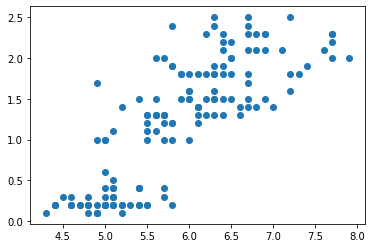

In [56]:
#selecting the column on which we need to make cluster.
plt.scatter(first_dataframe.sepal_length,first_dataframe.petal_width)

In [60]:
#now, we need to specify how many cluster do we need, this is trial an error method.
km = KMeans(n_clusters = 2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
#Now, unlike supervised regrsseion fit and then predict, here we directly fit and predict.
y_predict = km.fit_predict(first_dataframe[['sepal_length','petal_width']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
#Now, creating columns cluster in first_dataframe and keeping the y_predicted
first_dataframe['cluster'] = y_predict
first_dataframe.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


Text(0, 0.5, 'petal_width')

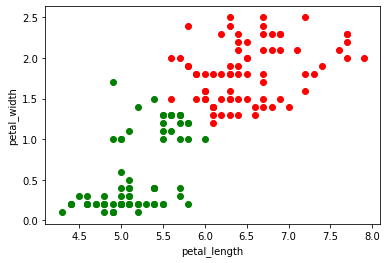

In [63]:
#Now, we need to keep those two different classification in two different variable.
f1 = first_dataframe[first_dataframe.cluster == 0]
f2 = first_dataframe[first_dataframe.cluster == 1]

#Now, plotting those corrdinates, with different colors
plt.scatter(f1.sepal_length,f1.petal_width,color = "red")
plt.scatter(f2.sepal_length,f2.petal_width,color = "green")

plt.xlabel("sepal_length")
plt.ylabel("petal_width")
#plt.legend()

In [64]:
print(km.cluster_centers_)
#this is to remove that red dots, this happened because our x and y scalling is not rite, therfore we need 
#to do some preprocessing.
scaler = MinMaxScaler()

#scalling x axis
scaler.fit(first_dataframe[['sepal_length']])
first_dataframe[['sepal_length']] = scaler.transform(first_dataframe[['sepal_length']])
#first_dataframe

#scalling y axis
scaler.fit(first_dataframe[['petal_width']])
first_dataframe[['petal_width']] = scaler.transform(first_dataframe[['petal_width']])
first_dataframe

# sepal_length and petal_width are tranformed from 0 to 1.

[[6.51866667 1.83333333]
 [5.168      0.564     ]]


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,0.222222,3.5,1.4,0.041667,Iris-setosa,1
1,0.166667,3.0,1.4,0.041667,Iris-setosa,1
2,0.111111,3.2,1.3,0.041667,Iris-setosa,1
3,0.083333,3.1,1.5,0.041667,Iris-setosa,1
4,0.194444,3.6,1.4,0.041667,Iris-setosa,1
...,...,...,...,...,...,...
145,0.666667,3.0,5.2,0.916667,Iris-virginica,0
146,0.555556,2.5,5.0,0.750000,Iris-virginica,0
147,0.611111,3.0,5.2,0.791667,Iris-virginica,0
148,0.527778,3.4,5.4,0.916667,Iris-virginica,0


In [65]:
#Since, we trnasformed variables, we need to fit_predict and plot again, to see correct cluster.
y_predict = km.fit_predict(first_dataframe[['sepal_length','petal_width']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
#Now, overring the cluster column with new predicted value
first_dataframe['cluster'] = y_predict
first_dataframe

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,0.222222,3.5,1.4,0.041667,Iris-setosa,1
1,0.166667,3.0,1.4,0.041667,Iris-setosa,1
2,0.111111,3.2,1.3,0.041667,Iris-setosa,1
3,0.083333,3.1,1.5,0.041667,Iris-setosa,1
4,0.194444,3.6,1.4,0.041667,Iris-setosa,1
...,...,...,...,...,...,...
145,0.666667,3.0,5.2,0.916667,Iris-virginica,0
146,0.555556,2.5,5.0,0.750000,Iris-virginica,0
147,0.611111,3.0,5.2,0.791667,Iris-virginica,0
148,0.527778,3.4,5.4,0.916667,Iris-virginica,0


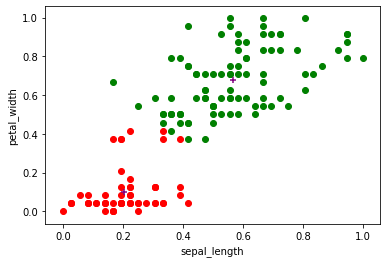

In [67]:
#Again, same process as above
f1 = first_dataframe[first_dataframe.cluster == 1]
f2 = first_dataframe[first_dataframe.cluster == 0]

plt.xlabel("sepal_length")
plt.ylabel("petal_width")

plt.scatter(f1.sepal_length,f1.petal_width,color="red")
plt.scatter(f2.sepal_length,f2.petal_width,color="green")

#now to check, where is the centroid 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="+",label="centroid")



In [51]:
# As, there is no change in the plot, now lets see what value of n_cluster will give correct clustering.

In [68]:
#Simply checking the centers of two cluster
km.cluster_centers_

array([[0.56630824, 0.67697133],
       [0.20419103, 0.1001462 ]])

In [69]:
#As, our above cluster wasnt proper, lets run K-Means clustering method to find best n_cluster value

#if data is huge and ,we are not sure about the cluster value, then we can use elbow method to find.
#i will try to find best cluster value in between 1 and 9
k_value = range(1,10)
sse = []

for i in k_value:
    km = KMeans(i)
    km.fit(first_dataframe[['sepal_length','petal_width']])
    sse.append(km.inertia_)

#Now, finding sum of square error, finding for all Value from 1 to 9.    
sse

[22.949284979423872,
 6.556610344309598,
 3.491932051076654,
 2.5099543948915883,
 1.9658119341934923,
 1.6371849733398642,
 1.3333437559761694,
 1.158798819008675,
 1.0143043392830187]

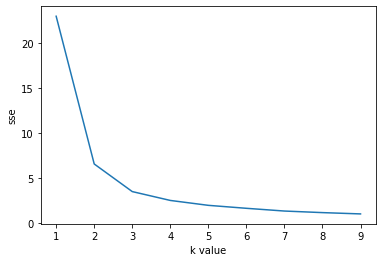

In [70]:
plt.xlabel("k value")
plt.ylabel("sse")
plt.plot(k_value,sse)